# 📘 Learning NLP Basics — Part 2

**Part-of-Speech Tagging, Lemmatization & Stopword Removal**

This notebook continues the NLP preprocessing series. We cover three essential recipes:

| Recipe | Description | Tool(s) |
|---|---|---|
| **Part-of-Speech Tagging** | Label every word with its grammatical role | spaCy · NLTK · OpenAI GPT |
| **Lemmatization** | Reduce words to their canonical/dictionary form | spaCy |
| **Stopword Removal** | Filter out high-frequency, low-meaning words | NLTK · spaCy · Frequency-based |

> **Text used:** A short excerpt from *The Adventures of Sherlock Holmes* by Arthur Conan Doyle.

---

## 0 — Environment Setup

In [1]:
# Install packages (uncomment if needed)
# !pip install nltk spacy openai

import nltk
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('averaged_perceptron_tagger_eng', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('tagsets', quiet=True)
print("✅ NLTK resources downloaded")

✅ NLTK resources downloaded


In [2]:
import subprocess, sys
subprocess.check_call([sys.executable, "-m", "spacy", "download", "en_core_web_sm", "-q"])

import spacy
small_model = spacy.load("en_core_web_sm")
print("✅ spaCy model loaded")

✅ spaCy model loaded


## Helper Functions

These mirror the `file_utils` and `lang_utils` notebooks from the book's repository.

In [3]:
import time

def read_text_file(filename: str) -> str:
    """Read and return the entire contents of a text file."""
    with open(filename, "r", encoding="utf-8") as f:
        return f.read()

def word_tokenize_nltk(text: str) -> list:
    """Tokenize text into words using NLTK."""
    return nltk.tokenize.word_tokenize(text)

def word_tokenize_spacy(text: str, model=None) -> list:
    """Tokenize text into words using spaCy."""
    if model is None:
        model = small_model
    doc = model(text)
    return [token.text for token in doc]

## Sample Text — *The Adventures of Sherlock Holmes*

We embed the excerpt directly. Replace with `read_text_file("../data/sherlock_holmes_1.txt")` if you have the repo.

In [4]:
sherlock_holmes_part_of_text = """To Sherlock Holmes she is always the woman. I have seldom heard \
him mention her under any other name. In his eyes she eclipses and \
predominates the whole of her sex. It was not that he felt any emotion \
akin to love for Irene Adler. All emotions, and that one particularly, \
were abhorrent to his cold, precise but admirably balanced mind. He was, \
I take it, the most perfect reasoning and observing machine that the \
world has seen, but as a lover he would have placed himself in a false \
position. He never spoke of the softer passions, save with a gibe and a \
sneer. They were admirable things for the observer—excellent for drawing \
the veil from men's motives and actions. But for the trained reasoner to \
admit such intrusions into his own delicate and finely adjusted \
temperament was to introduce a distracting factor which might throw a \
doubt upon all his mental results."""

print(sherlock_holmes_part_of_text[:200], "...")
print(f"\nTotal characters: {len(sherlock_holmes_part_of_text)}")

To Sherlock Holmes she is always the woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotio ...

Total characters: 872


---
## 1 — Part-of-Speech (POS) Tagging

POS tagging assigns a grammatical category (noun, verb, adjective, …) to each token.  
This is essential for downstream tasks such as:
- **Named Entity Recognition** — knowing POS helps identify entities
- **Word sense disambiguation** — *"bank"* as noun vs. verb
- **Information extraction** — filtering by word type

---
### 1.1 POS Tagging with spaCy

When the spaCy model processes text, the resulting `Doc` object contains `Token` objects, each with POS information already computed.

In [5]:
def pos_tag_spacy(text, model):
    """Return a list of (word, POS) tuples using spaCy."""
    doc = model(text)
    words = [token.text for token in doc]
    pos   = [token.pos_ for token in doc]
    return list(zip(words, pos))

# Run POS tagging
words_with_pos_spacy = pos_tag_spacy(sherlock_holmes_part_of_text, small_model)

# Display results
for word, pos in words_with_pos_spacy[:25]:
    print(f"  {word:20s} → {pos}")

print(f"\n→ Total tagged tokens: {len(words_with_pos_spacy)}")

  To                   → ADP
  Sherlock             → PROPN
  Holmes               → PROPN
  she                  → PRON
  is                   → AUX
  always               → ADV
  the                  → DET
  woman                → NOUN
  .                    → PUNCT
  I                    → PRON
  have                 → AUX
  seldom               → ADV
  heard                → VERB
  him                  → PRON
  mention              → VERB
  her                  → PRON
  under                → ADP
  any                  → DET
  other                → ADJ
  name                 → NOUN
  .                    → PUNCT
  In                   → ADP
  his                  → PRON
  eyes                 → NOUN
  she                  → PRON

→ Total tagged tokens: 173


spaCy uses the **Universal Dependencies** tagset. The full list of tags is available at:  
https://universaldependencies.org/u/pos/

Common Universal POS tags:

| Tag | Meaning | Examples |
|---|---|---|
| `NOUN` | Noun | woman, name, sex |
| `PROPN` | Proper noun | Sherlock, Holmes, Irene |
| `VERB` | Verb | eclipses, felt, placed |
| `ADJ` | Adjective | cold, precise, perfect |
| `ADV` | Adverb | seldom, admirably, always |
| `PRON` | Pronoun | she, he, I, it |
| `DET` | Determiner | the, a, his, her |
| `ADP` | Adposition | in, of, for, to |
| `CCONJ` | Coordinating conjunction | and, but |
| `PUNCT` | Punctuation | . , — |

> **Important:** spaCy does all of its processing at once and stores results in the `Doc` object. The POS information is available by iterating through `Token` objects.

---
### 1.2 POS Tagging with NLTK

In [6]:
def pos_tag_nltk(text):
    """Return a list of (word, POS) tuples using NLTK."""
    words = word_tokenize_nltk(text)
    words_with_pos = nltk.pos_tag(words)
    return words_with_pos

# Run POS tagging
words_with_pos_nltk = pos_tag_nltk(sherlock_holmes_part_of_text)

# Display results
for word, pos in words_with_pos_nltk[:25]:
    print(f"  {word:20s} → {pos}")

print(f"\n→ Total tagged tokens: {len(words_with_pos_nltk)}")

  To                   → TO
  Sherlock             → NNP
  Holmes               → NNP
  she                  → PRP
  is                   → VBZ
  always               → RB
  the                  → DT
  woman                → NN
  .                    → .
  I                    → PRP
  have                 → VBP
  seldom               → VBN
  heard                → RB
  him                  → PRP
  mention              → VB
  her                  → PRP
  under                → IN
  any                  → DT
  other                → JJ
  name                 → NN
  .                    → .
  In                   → IN
  his                  → PRP$
  eyes                 → NNS
  she                  → PRP

→ Total tagged tokens: 171


NLTK uses the **Penn Treebank** tagset, which is more fine-grained than Universal Dependencies.

Common Penn Treebank tags:

| Tag | Meaning | Example |
|---|---|---|
| `NN` | Noun, singular | woman, name |
| `NNS` | Noun, plural | eyes, emotions |
| `NNP` | Proper noun, singular | Sherlock, Holmes |
| `VB` | Verb, base form | speak, observe |
| `VBD` | Verb, past tense | felt, placed |
| `VBZ` | Verb, 3rd person singular present | eclipses, predominates |
| `JJ` | Adjective | cold, precise |
| `RB` | Adverb | seldom, admirably |
| `PRP` | Personal pronoun | she, he, I |
| `PRP$` | Possessive pronoun | his, her |
| `DT` | Determiner | the, a |
| `IN` | Preposition / subordinating conjunction | in, of, for |

You can look up any tag interactively:
```python
nltk.help.upenn_tagset('VBZ')
```

In [9]:
# Look up a specific tag
nltk.download('tagsets_json', quiet=True)
nltk.help.upenn_tagset('VBZ')

VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...


### 1.3 Speed Comparison — spaCy vs NLTK

In [10]:
start = time.time()
pos_tag_spacy(sherlock_holmes_part_of_text, small_model)
spacy_time = time.time() - start

start = time.time()
pos_tag_nltk(sherlock_holmes_part_of_text)
nltk_time = time.time() - start

print(f"spaCy : {spacy_time:.6f} s")
print(f"NLTK  : {nltk_time:.6f} s")

if spacy_time > nltk_time:
    print(f"\nNLTK is ~{spacy_time/nltk_time:.1f}× faster for POS tagging alone.")
else:
    print(f"\nspaCy is ~{nltk_time/spacy_time:.1f}× faster for POS tagging alone.")

print("\n💡 However, spaCy computes POS as part of its full pipeline,")
print("   so if you are doing further processing, spaCy is the better choice.")

spaCy : 0.051323 s
NLTK  : 0.011746 s

NLTK is ~4.4× faster for POS tagging alone.

💡 However, spaCy computes POS as part of its full pipeline,
   so if you are doing further processing, spaCy is the better choice.


### 1.4 POS Tagging with OpenAI GPT (Optional)

We can also use the OpenAI API to perform POS tagging. The model can be instructed to return tags in NLTK/Penn Treebank format.

> ⚠️ **You need your own OpenAI API key** for this section to run. Set it in the cell below.

In [38]:
from google.colab import userdata
import os
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

In [42]:
from ast import literal_eval

def pos_tag_gpt(text, api_key):
    """Return a list of (word, POS) tuples using the OpenAI API."""
    from openai import OpenAI
    client = OpenAI(api_key=api_key)

    prompt = f"""Decide what the part of speech tags are for a sentence.
    Preserve original capitalization.
    Return the list in the format of a python tuple: (word, part of speech).
    Do not include any other explanations.
    Sentence: {text}."""

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        temperature=0,
        max_tokens=256,
        top_p=1.0,
        frequency_penalty=0,
        presence_penalty=0,
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
    )
    result = response.choices[0].message.content
    result = result.replace("\n", "")
    result = list(literal_eval(result))
    return result

# --- Run GPT POS tagging (only if API key is set) ---
if OPEN_AI_KEY:
    first_sentence = "In his eyes she eclipses and predominates the whole of her sex."

    start = time.time()
    words_with_pos_gpt = pos_tag_gpt(first_sentence, OPEN_AI_KEY)
    gpt_time = time.time() - start

    print("GPT output:")
    for word, pos in words_with_pos_gpt:
        print(f"  {word:20s} → {pos}")
    print(f"\nGPT time: {gpt_time:.4f} s")

    # Compare with NLTK
    words_with_pos_nltk_sent = pos_tag_nltk(first_sentence)
    print(f"\nGPT == NLTK? {words_with_pos_gpt == words_with_pos_nltk_sent}")

    # Show differences
    if words_with_pos_gpt != words_with_pos_nltk_sent:
        print("\nDifferences:")
        for gpt_pair, nltk_pair in zip(words_with_pos_gpt, words_with_pos_nltk_sent):
            if gpt_pair != nltk_pair:
                print(f"  '{gpt_pair[0]}': GPT={gpt_pair[1]}, NLTK={nltk_pair[1]}")
else:
    print("⏭️  Skipped — set OPEN_AI_KEY to enable GPT POS tagging.")
    print("   The GPT model produces very similar results to NLTK but is ~400× slower.")

GPT output:
  In                   → IN
  his                  → PRP$
  eyes                 → NNS
  she                  → PRP
  eclipses             → VBZ
  and                  → CC
  predominates         → VBZ
  the                  → DT
  whole                → JJ
  of                   → IN
  her                  → PRP$
  sex                  → NN

GPT time: 1.7039 s

GPT == NLTK? False

Differences:
  'whole': GPT=JJ, NLTK=NN


> **GPT vs NLTK/spaCy for POS tagging:**
> - GPT produces very similar results to NLTK (Penn Treebank style tags).
> - Minor differences exist (e.g., GPT may tag *"whole"* as JJ while NLTK tags it as NN).
> - GPT is **~400× slower** due to the API round-trip — not practical for bulk tagging.
> - Useful when you need POS tagging as part of a larger prompt-based workflow.

### 1.5 Other Languages

For other languages, load the appropriate spaCy model:

```python
# Spanish
nlp_es = spacy.load("es_core_news_sm")
doc = nlp_es("En sus ojos ella eclipsa y predomina sobre todo su sexo.")
for token in doc:
    print(token.text, token.pos_)
```

If spaCy doesn't have a model for your language, you can **train your own**:  
https://spacy.io/usage/training#tagger-parser

---

## 2 — Combining Similar Words (Lemmatization)

**Lemmatization** finds the canonical (dictionary) form of a word:
- *cats* → **cat**
- *ran* → **run**
- *leaves* → **leave** (verb) or **leaf** (noun)

This is useful when we want to match words without listing every possible inflected form.

---
### 2.1 Basic Lemmatization with spaCy

When spaCy processes text, each `Token` object contains `.lemma_` with the lemma.

In [43]:
# Lemmatize individual words
words = ["leaf", "leaves", "booking", "writing", "completed", "stemming"]
docs = [small_model(word) for word in words]

print(f"{'Word':15s} → {'Lemma':15s}")
print("-" * 32)
for doc in docs:
    for token in doc:
        print(f"  {token.text:15s} → {token.lemma_:15s}")

Word            → Lemma          
--------------------------------
  leaf            → leaf           
  leaves          → leave          
  booking         → book           
  writing         → write          
  completed       → complete       
  stemming        → stem           


> **Ambiguity note:** Some words are ambiguous. For example, *"leaves"* could be a verb (lemma: *leave*) or a noun (lemma: *leaf*). When spaCy processes continuous text instead of isolated words, it uses context to disambiguate correctly.

### 2.2 Lemmatization on Continuous Text

In [44]:
doc = small_model(sherlock_holmes_part_of_text)

# Show only words where the lemma differs from the original
print(f"{'Token':20s} → {'Lemma':20s} {'POS'}")
print("=" * 50)
for token in doc:
    if token.text.lower() != token.lemma_.lower() and not token.is_punct and not token.is_space:
        print(f"  {token.text:20s} → {token.lemma_:20s} {token.pos_}")

Token                → Lemma                POS
  is                   → be                   AUX
  heard                → hear                 VERB
  him                  → he                   PRON
  her                  → she                  PRON
  eyes                 → eye                  NOUN
  eclipses             → eclipse              VERB
  predominates         → predominate          VERB
  was                  → be                   AUX
  felt                 → feel                 VERB
  emotions             → emotion              NOUN
  were                 → be                   AUX
  was                  → be                   AUX
  observing            → observe              VERB
  has                  → have                 AUX
  seen                 → see                  VERB
  placed               → place                VERB
  spoke                → speak                VERB
  softer               → soft                 ADJ
  passions             → passion        

### 2.3 Checking Base Form with the Lemmatizer Object

We can access the spaCy lemmatizer component directly from the pipeline to check whether a word is already in its base form. This can be useful when manipulating grammar (e.g., converting passive voice to active).

The pipeline components are stored as a list of `(name, component)` tuples:

In [45]:
# Get the lemmatizer component from the pipeline
lemmatizer = None
for name, proc in small_model.pipeline:
    if name == "lemmatizer":
        lemmatizer = proc

if lemmatizer:
    print("✅ Lemmatizer component found\n")

    # Check base form for each token
    doc = small_model(sherlock_holmes_part_of_text)

    print(f"{'Token':20s} {'Is Base Form?':15s} {'Lemma'}")
    print("-" * 50)
    for token in list(doc)[:20]:
        if not token.is_punct and not token.is_space:
            is_base = lemmatizer.is_base_form(token)
            marker = "✓" if is_base else "✗"
            print(f"  {token.text:20s} {marker:15s} {token.lemma_}")
else:
    print("⚠️ Lemmatizer not found in pipeline")

✅ Lemmatizer component found

Token                Is Base Form?   Lemma
--------------------------------------------------
  To                   ✗               to
  Sherlock             ✗               Sherlock
  Holmes               ✗               Holmes
  she                  ✗               she
  is                   ✗               be
  always               ✗               always
  the                  ✗               the
  woman                ✓               woman
  I                    ✗               I
  have                 ✗               have
  seldom               ✗               seldom
  heard                ✗               hear
  him                  ✗               he
  mention              ✓               mention
  her                  ✗               she
  under                ✗               under
  any                  ✗               any
  other                ✓               other
  name                 ✓               name


> For more on spaCy's processing pipeline and its components, see:  
> https://spacy.io/usage/processing-pipelines/

---

## 3 — Removing Stopwords

**Stopwords** are very frequent words (*the, is, but, can, we, …*) that carry little semantic meaning. Removing them is useful when:
- Counting frequent words to determine a text's **topic**
- Building **bag-of-words** or **TF-IDF** representations
- Reducing noise in **text classification** or **topic modeling**

---
### 3.1 Stopword Removal with NLTK

In [46]:
from nltk.corpus import stopwords

# View the NLTK English stopwords
stop_words_nltk = stopwords.words('english')
print(f"NLTK has {len(stop_words_nltk)} English stopwords.")
print(f"\nSample: {stop_words_nltk[:20]}")

NLTK has 198 English stopwords.

Sample: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


> **Supported languages for NLTK stopwords:**  
> Arabic, Azerbaijani, Danish, Dutch, English, Finnish, French, German, Greek, Hungarian, Italian, Kazakh, Nepali, Norwegian, Portuguese, Romanian, Russian, Spanish, Swedish, and Turkish.

In [47]:
# Tokenize the text
words = word_tokenize_nltk(sherlock_holmes_part_of_text)
print(f"Total tokens before filtering: {len(words)}")

# Remove stopwords — check lowercase version since stopwords list is lowercase
words_filtered_nltk = [word for word in words
                       if word.lower() not in stopwords.words("english")]

print(f"Total tokens after filtering:  {len(words_filtered_nltk)}")
print(f"Stopwords removed:             {len(words) - len(words_filtered_nltk)}")
print(f"\nFiltered tokens (first 20): {words_filtered_nltk[:20]}")

Total tokens before filtering: 171
Total tokens after filtering:  89
Stopwords removed:             82

Filtered tokens (first 20): ['Sherlock', 'Holmes', 'always', 'woman', '.', 'seldom', 'heard', 'mention', 'name', '.', 'eyes', 'eclipses', 'predominates', 'whole', 'sex', '.', 'felt', 'emotion', 'akin', 'love']


More than half the tokens are removed — they were common words that contribute little to the meaning.

> **Note:** The NLTK stopwords list is a regular Python list. You can customize it:
> ```python
> my_stopwords = stopwords.words('english')
> my_stopwords.append("also")      # add a word
> my_stopwords.remove("not")       # remove a word (be careful!)
> ```

---
### 3.2 Stopword Removal with spaCy

In [48]:
# spaCy stopwords are stored as a set
stop_words_spacy = small_model.Defaults.stop_words
print(f"spaCy has {len(stop_words_spacy)} English stopwords.")

# Tokenize and filter
words = word_tokenize_nltk(sherlock_holmes_part_of_text)
words_filtered_spacy = [word for word in words
                        if word.lower() not in stop_words_spacy]

print(f"\nTotal tokens before filtering: {len(words)}")
print(f"Total tokens after filtering:  {len(words_filtered_spacy)}")
print(f"\nFiltered tokens (first 20): {words_filtered_spacy[:20]}")

spaCy has 326 English stopwords.

Total tokens before filtering: 171
Total tokens after filtering:  79

Filtered tokens (first 20): ['Sherlock', 'Holmes', 'woman', '.', 'seldom', 'heard', 'mention', '.', 'eyes', 'eclipses', 'predominates', 'sex', '.', 'felt', 'emotion', 'akin', 'love', 'Irene', 'Adler', '.']


In [49]:
# spaCy stopwords are a set — easy to add/remove
print(f"Current count: {len(stop_words_spacy)}")

stop_words_spacy.add("new")
print(f"After adding 'new': {len(stop_words_spacy)}")

stop_words_spacy.remove("new")
print(f"After removing 'new': {len(stop_words_spacy)}")

Current count: 326
After adding 'new': 327
After removing 'new': 326


### 3.3 Comparing NLTK vs spaCy Stopword Lists

In [50]:
stop_set_nltk  = set(stopwords.words('english'))
stop_set_spacy = small_model.Defaults.stop_words

only_nltk  = stop_set_nltk - stop_set_spacy
only_spacy = stop_set_spacy - stop_set_nltk
shared     = stop_set_nltk & stop_set_spacy

print(f"NLTK only  ({len(only_nltk):3d}): {sorted(only_nltk)[:10]} ...")
print(f"spaCy only ({len(only_spacy):3d}): {sorted(only_spacy)[:10]} ...")
print(f"Shared     ({len(shared):3d})")

NLTK only  ( 75): ['ain', 'aren', "aren't", 'couldn', "couldn't", 'd', 'didn', "didn't", 'doesn', "doesn't"] ...
spaCy only (203): ["'d", "'ll", "'m", "'re", "'s", "'ve", 'across', 'afterwards', 'almost', 'alone'] ...
Shared     (123)


---
### 3.4 Building a Custom Stopwords List from Word Frequencies

Instead of relying on a predefined list, we can automatically compile stopwords by finding the **most frequent words** in our corpus. This is useful when working with domain-specific text.

The function below supports two modes:
- **Float** `cut_off` (e.g., `0.02`): use the top N% of most frequent words
- **Integer** `cut_off` (e.g., `100`): use words with frequency above this threshold

In [51]:
from nltk.probability import FreqDist

def compile_stopwords_list_frequency(text, cut_off=0.02):
    """
    Compile a stopwords list from word frequencies.

    Parameters
    ----------
    text : str
        Input text to analyze.
    cut_off : float or int
        - float: top percentage of words to treat as stopwords (e.g., 0.02 = top 2%)
        - int: absolute frequency threshold (words above this count are stopwords)

    Returns
    -------
    list of str
        The compiled stopwords list.
    """
    words = word_tokenize_nltk(text)
    freq_dist = FreqDist(word.lower() for word in words)
    words_with_frequencies = [
        (word, freq_dist[word]) for word in freq_dist.keys()
    ]
    sorted_words = sorted(words_with_frequencies, key=lambda tup: tup[1])

    if isinstance(cut_off, int):
        # Absolute frequency cutoff
        sw = [t[0] for t in sorted_words if t[1] > cut_off]
    elif isinstance(cut_off, float):
        # Percentage cutoff
        length_cutoff = int(cut_off * len(sorted_words))
        sw = [t[0] for t in sorted_words[-length_cutoff:]]
    else:
        raise TypeError(
            "cut_off must be a float (percentage) or int (frequency threshold)"
        )
    return sw

In [52]:
# Use the sample text (in practice, use the full book for better results)
text = sherlock_holmes_part_of_text

# Default: top 2% most frequent words
sw_default = compile_stopwords_list_frequency(text)
print(f"Default (top 2%): {len(sw_default)} stopwords")
print(f"  Words: {sw_default}")

Default (top 2%): 2 stopwords
  Words: ['the', '.']


In [53]:
# Top 5% most frequent words
sw_5pct = compile_stopwords_list_frequency(text, cut_off=0.05)
print(f"Top 5%: {len(sw_5pct)} stopwords")
print(f"  Words: {sw_5pct}")

Top 5%: 5 stopwords
  Words: ['and', 'a', ',', 'the', '.']


In [54]:
# Absolute frequency cutoff: words appearing more than 3 times
sw_abs = compile_stopwords_list_frequency(text, cut_off=3)
print(f"Frequency > 3: {len(sw_abs)} stopwords")
print(f"  Words: {sw_abs}")

Frequency > 3: 9 stopwords
  Words: ['his', 'he', 'for', 'to', 'and', 'a', ',', 'the', '.']


> **How it works:**
> 1. Tokenize the text and create a frequency distribution (`FreqDist`)
> 2. Sort words by frequency
> 3. If `cut_off` is a **float** → return the top N% of words
> 4. If `cut_off` is an **int** → return words with frequency above the threshold
>
> For best results, use this with a **large corpus** (e.g., the full book) rather than a short excerpt. The larger the text, the more reliable the frequency-based stopwords will be.

### 3.5 Visualizing Word Frequencies

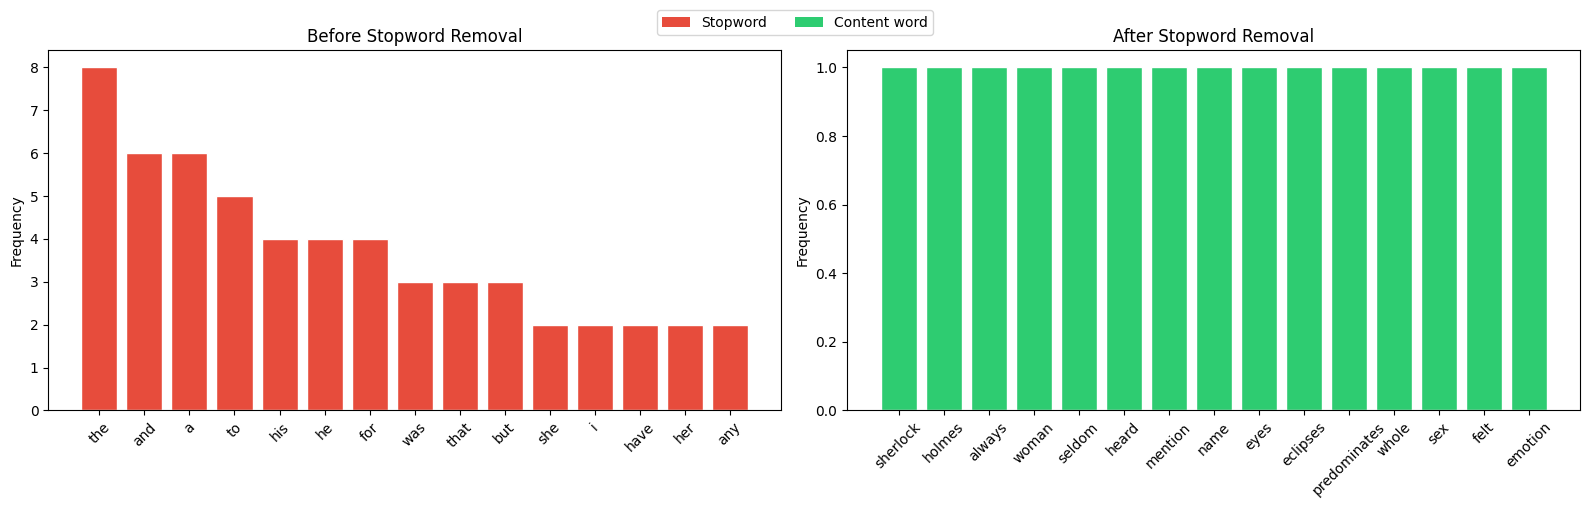

🔴 Left: stopwords dominate the top positions
🟢 Right: after removal, meaningful words like 'holmes', 'eyes', 'woman' appear


In [58]:
%matplotlib inline
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from nltk.corpus import stopwords

words = word_tokenize_nltk(sherlock_holmes_part_of_text)
stop_set = set(stopwords.words('english'))

# All words
all_words = [w.lower() for w in words if w.isalpha()]
# Content words only (stopwords removed)
content_words = [w for w in all_words if w not in stop_set]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# --- Left: Before stopword removal ---
freq_before = FreqDist(all_words)
top_before = freq_before.most_common(15)
colors_before = ['#e74c3c' if w in stop_set else '#2ecc71' for w, _ in top_before]

axes[0].bar([w for w, _ in top_before], [c for _, c in top_before],
            color=colors_before, edgecolor='white')
axes[0].set_title("Before Stopword Removal")
axes[0].set_ylabel("Frequency")
axes[0].tick_params(axis='x', rotation=45)

# --- Right: After stopword removal ---
freq_after = FreqDist(content_words)
top_after = freq_after.most_common(15)

axes[1].bar([w for w, _ in top_after], [c for _, c in top_after],
            color='#2ecc71', edgecolor='white')
axes[1].set_title("After Stopword Removal")
axes[1].set_ylabel("Frequency")
axes[1].tick_params(axis='x', rotation=45)

# Legend
fig.legend(handles=[
    Patch(facecolor='#e74c3c', label='Stopword'),
    Patch(facecolor='#2ecc71', label='Content word')
], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout()
plt.show()

print("🔴 Left: stopwords dominate the top positions")
print("🟢 Right: after removal, meaningful words like 'holmes', 'eyes', 'woman' appear")

## 4 — Putting It All Together

A complete preprocessing function that performs POS tagging, lemmatization, and stopword removal in one pass:

In [56]:
def full_preprocess(text, model=None, remove_stopwords=True, lemmatize=True):
    """
    Complete NLP preprocessing pipeline:
    tokenization → POS tagging → lemmatization → stopword removal.

    Returns a list of dicts with detailed token info.
    """
    if model is None:
        model = small_model
    doc = model(text)
    results = []
    for token in doc:
        if token.is_punct or token.is_space:
            continue
        if remove_stopwords and token.is_stop:
            continue

        results.append({
            "text": token.text,
            "lemma": token.lemma_ if lemmatize else token.text,
            "pos": token.pos_,
            "tag": token.tag_,
            "is_stop": token.is_stop,
        })
    return results

# Run the full pipeline
processed = full_preprocess(sherlock_holmes_part_of_text)

print(f"{'Text':18s} {'Lemma':18s} {'POS':8s} {'Tag'}")
print("=" * 55)
for tok in processed[:30]:
    print(f"  {tok['text']:18s} {tok['lemma']:18s} {tok['pos']:8s} {tok['tag']}")

print(f"\n→ {len(processed)} meaningful tokens after full preprocessing")

Text               Lemma              POS      Tag
  Sherlock           Sherlock           PROPN    NNP
  Holmes             Holmes             PROPN    NNP
  woman              woman              NOUN     NN
  seldom             seldom             ADV      RB
  heard              hear               VERB     VBN
  mention            mention            VERB     VB
  eyes               eye                NOUN     NNS
  eclipses           eclipse            VERB     VBZ
  predominates       predominate        VERB     VBZ
  sex                sex                NOUN     NN
  felt               feel               VERB     VBD
  emotion            emotion            NOUN     NN
  akin               akin               ADJ      JJ
  love               love               VERB     VB
  Irene              Irene              PROPN    NNP
  Adler              Adler              PROPN    NNP
  emotions           emotion            NOUN     NNS
  particularly       particularly       ADV      RB
  a

---
## Summary

| Recipe | Key Points |
|---|---|
| **POS Tagging** | spaCy uses Universal Dependencies tags (`.pos_`); NLTK uses Penn Treebank tags; GPT can mimic NLTK but is ~400× slower |
| **Lemmatization** | spaCy automatically uses POS context for accurate lemmas; ambiguous isolated words may get wrong lemmas |
| **Stopwords** | NLTK has ~198 English stopwords; spaCy has ~326; frequency-based approach adapts to your corpus |

### Key Takeaways

1. **spaCy** processes everything in one pass — POS, lemma, and stopword flags are all available on each `Token`.
2. **NLTK** is lightweight and fast for individual tasks but requires separate steps.
3. **GPT/LLMs** can perform POS tagging but are impractical for bulk processing due to cost and latency.
4. **Frequency-based stopwords** adapt to your specific domain and corpus.

### Further Reading
- Universal Dependencies POS tags: https://universaldependencies.org/u/pos/
- Penn Treebank tagset: run `nltk.help.upenn_tagset()`
- spaCy processing pipelines: https://spacy.io/usage/processing-pipelines/
- spaCy training custom models: https://spacy.io/usage/training#tagger-parser